**Data Science**



**Professor:** Geraldo Gomes

**O presente codigo tem como intuito análisar uma base de dados em formato csv usando estatistica descritiva, fazer sua limpeza e aplicar técnicas de machine learning.**

**O jira_issue_o.csv é uma base de dados de um projeto, obtida através da plataforma Github, onde nela podemos observar diversas característcas como os variados tipos de tasks do projeto e suas respectivas dificuldades.**

**Ainda com o jira_issue_0.csv foi possível fazer uma limpeza e posteriormente a aplicação de uma técnica de machine learning.**

In [ ]:
#Código base para upload de arquivos para o Google Colab
from google.colab import files
uploaded = files.upload()

Saving jira_issue_0.csv to jira_issue_0.csv


**Feito o upload do arquivo csv começaremos a trabalhar com ele e fazer as devidas análises**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Sera usado o latin-1, pois o padrao UTF-8 nao foi suficiente, outro possivel encoding popular seria o Windows-1252
sprints_data = pd.read_csv("jira_issue_0.csv", encoding = "latin-1") 

In [ ]:
sprints_data.shape

(10852, 14)

In [ ]:
sprints_data.head(5)

,boardid,sprintid,type,priority,no_comment,no_affectversion,no_fixversion,no_issuelink,no_blocking,no_blockedby,no_fixversion_change,no_priority_change,no_des_change,gunning_fog
0,43,1,Sub-task,Minor,0,0,2,0,0,0,0,0,0,easy
1,43,1,Sub-task,Minor,0,0,2,0,0,0,0,0,0,easy
2,43,1,Sub-task,Minor,0,0,2,0,0,0,0,0,0,easy
3,43,1,Sub-task,Minor,0,0,0,0,0,0,0,0,0,easy
4,43,1,Sub-task,Minor,0,1,1,1,0,0,0,0,0,medium


In [ ]:
sprints_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10852 entries, 0 to 10851
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   boardid               10852 non-null  int64 
 1   sprintid              10852 non-null  int64 
 2   type                  10852 non-null  object
 3   priority              9445 non-null   object
 4   no_comment            10852 non-null  int64 
 5   no_affectversion      10852 non-null  int64 
 6   no_fixversion         10852 non-null  int64 
 7   no_issuelink          10852 non-null  int64 
 8   no_blocking           10852 non-null  int64 
 9   no_blockedby          10852 non-null  int64 
 10  no_fixversion_change  10852 non-null  int64 
 11  no_priority_change    10852 non-null  int64 
 12  no_des_change         10852 non-null  int64 
 13  gunning_fog           10852 non-null  object
dtypes: int64(11), object(3)
memory usage: 1.2+ MB


<b>Primeiras observações</b>
* Como primeira análise podemos perceber que, esse dataset possui 10.852 elementos, sendo eles divididos em 14 colunas distintas.
* Algumas colunas possuem objetos nulos, porém a maior parte está completa.
* As colunas possuem formatação de nome em [snake_case](https://en.wikipedia.org/wiki/Snake_case) como se opta em boas práticas de python.


In [ ]:
sprints_data.columns

Index(['boardid', 'sprintid', 'type', 'priority', 'no_comment',
       'no_affectversion', 'no_fixversion', 'no_issuelink', 'no_blocking',
       'no_blockedby', 'no_fixversion_change', 'no_priority_change',
       'no_des_change', 'gunning_fog'],
      dtype='object')

In [ ]:
#Renomeando colunas
sprints_data.rename({"boardid":"board_id",
               "sprintid":"sprint_id"}, axis=1, inplace=True)
print(sprints_data.columns)

Index(['board_id', 'sprint_id', 'type', 'priority', 'no_comment',
       'no_affectversion', 'no_fixversion', 'no_issuelink', 'no_blocking',
       'no_blockedby', 'no_fixversion_change', 'no_priority_change',
       'no_des_change', 'gunning_fog'],
      dtype='object')


**Após feita uma análise inicial da base de dados, foi verificado que não havia uma uniformidade nos nomes das colunas e por isso, cada coluna foi renomeada de modo que ficassem com a mesma formatação**

In [ ]:
sprints_data.describe(include='all')

,board_id,sprint_id,type,priority,no_comment,no_affectversion,no_fixversion,no_issuelink,no_blocking,no_blockedby,no_fixversion_change,no_priority_change,no_des_change,gunning_fog
count,10852.000000,10852.000000,10852,9445,10852.000000,10852.000000,10852.000000,10852.000000,10852.0,10852.0,10852.000000,10852.000000,10852.000000,10852
unique,NaN,NaN,19,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,Bug,Minor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,easy
freq,NaN,NaN,5484,4920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4603
mean,723.000184,765.097862,NaN,NaN,1.307962,0.585238,0.912919,0.544600,0.0,0.0,0.273498,0.166329,0.728069,NaN
std,356.709806,705.962423,NaN,NaN,4.241802,0.943142,0.713801,1.253266,0.0,0.0,0.879960,0.511122,1.914025,NaN
min,43.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,NaN
25%,441.000000,203.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,NaN
50%,732.000000,515.000000,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,NaN
75%,1013.000000,1239.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.000000,0.000000,1.000000,NaN


### **Colunas com valores não fundamentais para análise:**

Como pode ser percebido na descrição da DataFrame, as colunas 'no_comment', 'no_affectversion', 'no_fixversion', 'no_issuelink', 'no_blocking', 'no_blockedby', 'no_fixversion_change', 'no_priority_change' possuem informações não fundamentais para a análise, ou seja essas colunas não possuem valor a contribuir para análises, portanto podemos retirá-las do dataset

In [ ]:
sprints_data = sprints_data.drop("no_comment", axis=1)
sprints_data = sprints_data.drop("no_affectversion", axis=1)
sprints_data = sprints_data.drop("no_fixversion", axis=1)
sprints_data = sprints_data.drop("no_issuelink", axis=1)
sprints_data = sprints_data.drop("no_blocking", axis=1)
sprints_data = sprints_data.drop("no_blockedby", axis=1)
sprints_data = sprints_data.drop("no_fixversion_change", axis=1)
sprints_data = sprints_data.drop("no_priority_change", axis=1)
sprints_data = sprints_data.drop("no_des_change", axis=1)

In [ ]:
sprints_data['priority'] = sprints_data['priority'].str.replace('null','np.nan')
sprints_data.dropna()

,board_id,sprint_id,type,priority,gunning_fog
0,43,1,Sub-task,Minor,easy
1,43,1,Sub-task,Minor,easy
2,43,1,Sub-task,Minor,easy
3,43,1,Sub-task,Minor,easy
4,43,1,Sub-task,Minor,medium
...,...,...,...,...,...
10843,1206,2019,Bug,Major,hard
10846,1206,2074,Bug,Major,hard
10848,1206,2125,Bug,Major,hard
10850,1206,2199,Bug,Major,hard


**Feita uma análise mais aprofundada da base de dados notou-se que algumas colunas apresentavam informações pouco ou não relevantes para nossa análise e com isso foi decidido o drop dessas colunas ou seja, a exclusão.**

**Na coluna priority foi constatado a existencia de dados nulos, com isso todos os dados nulos foram devidamente removidos.**

In [ ]:
sprints_data.describe(include='all')

,board_id,sprint_id,type,priority,gunning_fog
count,10852.000000,10852.000000,10852,9445,10852
unique,NaN,NaN,19,5,3
top,NaN,NaN,Bug,Minor,easy
freq,NaN,NaN,5484,4920,4603
mean,723.000184,765.097862,NaN,NaN,NaN
std,356.709806,705.962423,NaN,NaN,NaN
min,43.000000,1.000000,NaN,NaN,NaN
25%,441.000000,203.000000,NaN,NaN,NaN
50%,732.000000,515.000000,NaN,NaN,NaN
75%,1013.000000,1239.000000,NaN,NaN,NaN


In [ ]:
#Cruzando as tabelas
pd.crosstab(sprints_data['type'],sprints_data['gunning_fog'])

gunning_fog,easy,hard,medium
type,,,
Bug,1525,2993,966
Concern,18,0,0
Crucible Subtask,0,0,54
Dev. Sub-task,158,0,0
Development Task,0,13,0
Documentation,2,0,0
Feedback,2,4,0
Fug,0,0,2
Improvement,180,224,108


**A tabela acima mostra um cruzamento entre as colunas de tipo de tasks e as colunas de dificuldade, mostrando assim as dificuldades de cada task que existe no dataset.**

In [ ]:
#Cruzando as tabelas (%)
pd.crosstab(sprints_data['type'],sprints_data['gunning_fog']).apply(lambda r: ((r/r.sum())*100).round(2) , axis=1)

gunning_fog,easy,hard,medium
type,,,
Bug,27.81,54.58,17.61
Concern,100.00,0.00,0.00
Crucible Subtask,0.00,0.00,100.00
Dev. Sub-task,100.00,0.00,0.00
Development Task,0.00,100.00,0.00
Documentation,100.00,0.00,0.00
Feedback,33.33,66.67,0.00
Fug,0.00,0.00,100.00
Improvement,35.16,43.75,21.09


**A tabela acima mostra um cruzamento entre as colunas de tipo de tasks e as colunas de dificuldade, mostrando assim, em forma de porcentagem, as dificuldades de cada task que existe no dataset.**

**Decidimos focar nossa análise nos tipos de taks que apareciam no projeto e fizemos um cruzamento das colunas type com a coluna gunning_fog que é relacionada a dificuldade das tasks.**

Pela analise podemos observar:

*   Tasks de tipo "**Bug**" são as que possuem maior incidência.
*   Tasks com dificuldade "**Hard**" foram 54,58% das atividades do tipo "**Bug**".




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99aecadd30>,
      dtype=object)

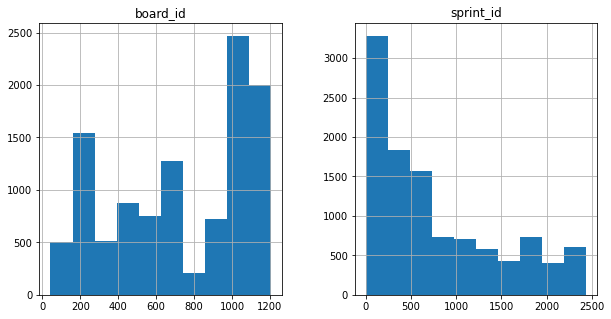

In [ ]:
#Importando biblioteca matplotlib para visualização dos dados
import matplotlib.pyplot as plt
%matplotlib inline

#Gerando histograma de todas as dimensões contínuas
sprints_data.hist(figsize=(10,5))

**O gráfico acima apresenta uma visualização de todas as dimensões contínuas presentes no dataset, que são as colunas board_id e sprint_id.**

In [ ]:
#importando a biblioteca seaborn para a geração de gráficos mais sofisticados
import seaborn as sns

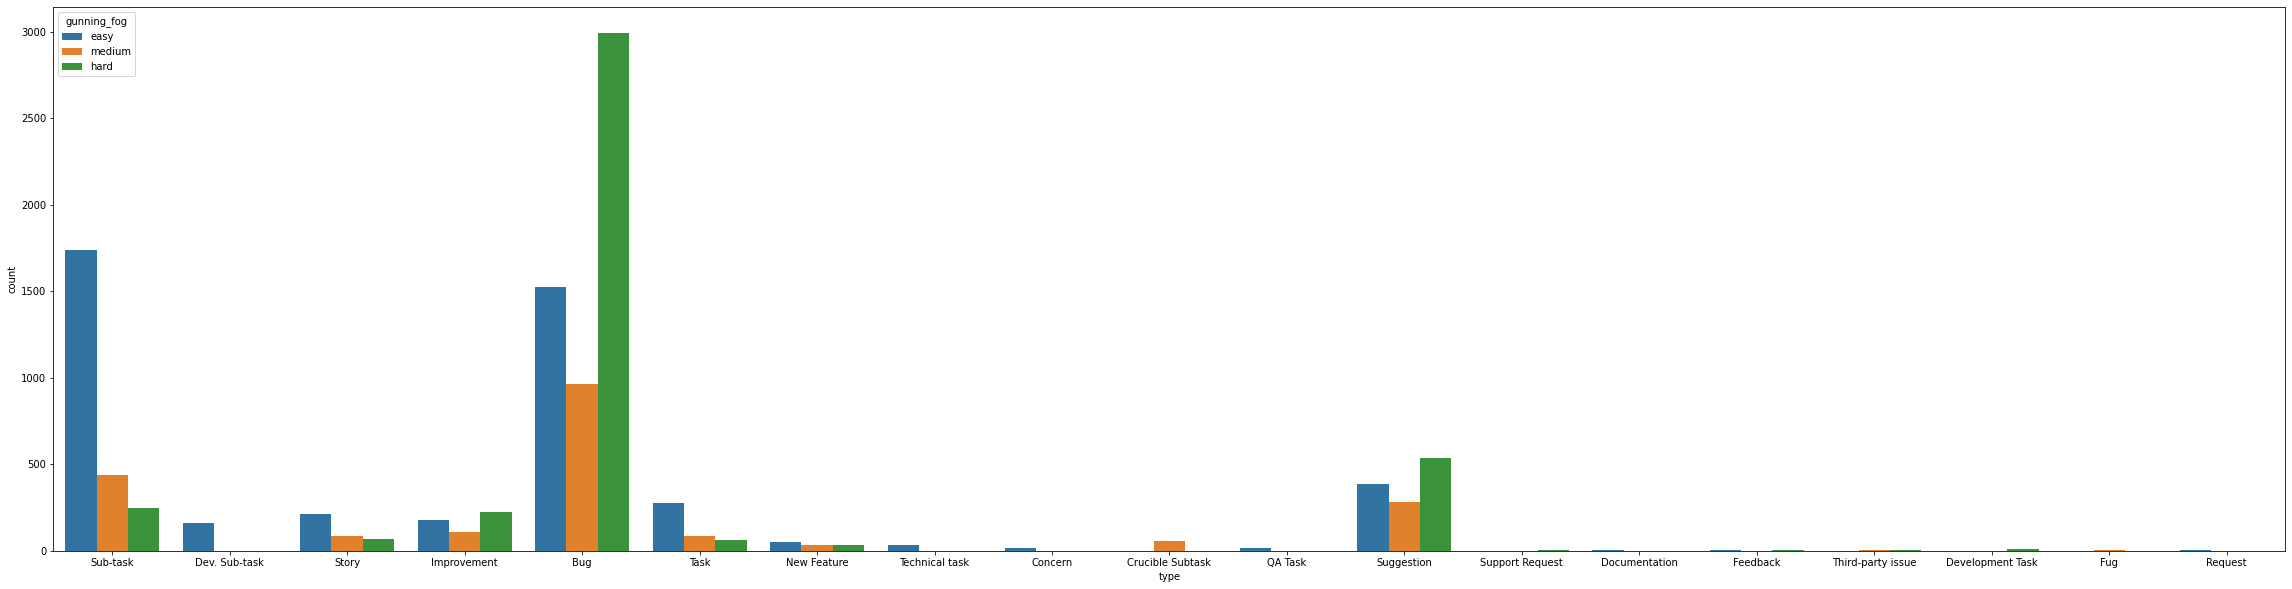

In [ ]:
plt.figure(figsize=(40,10)) # Modificando o tamanho do gráfico para melhor visualização.
sns.countplot(x="type", hue="gunning_fog", data=sprints_data)
plt.show()

**O grafico acima apresenta uma visualização da dificuldade de cada task que existe no dataset.**

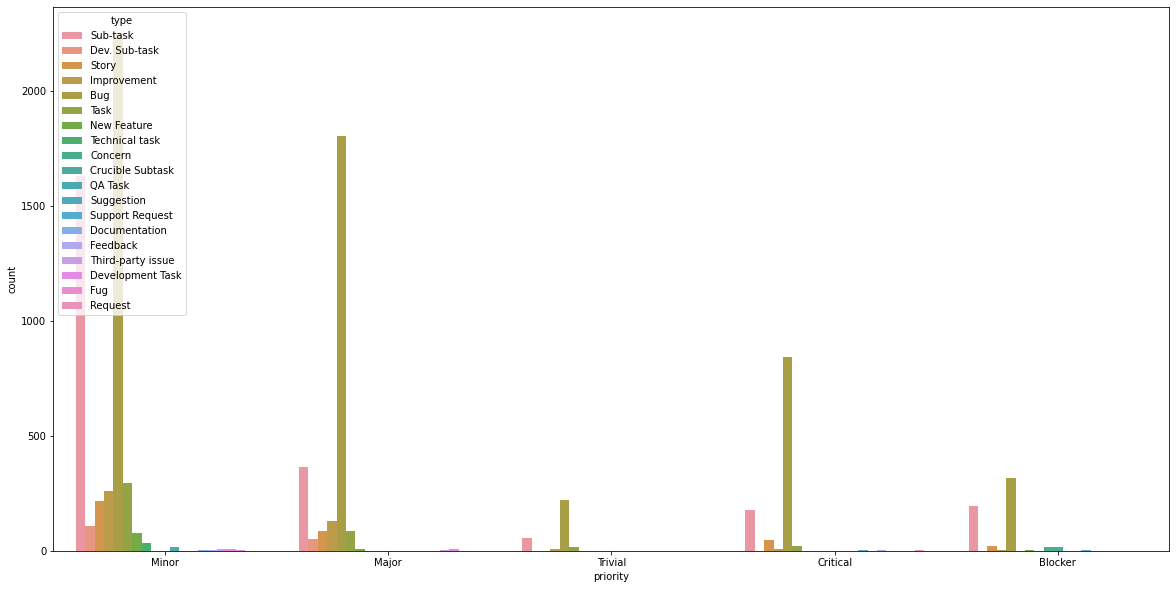

In [ ]:
plt.figure(figsize=(20,10)) # Modificando o tamanho do gráfico para melhor visualização.
sns.countplot(x="priority", hue="type", data=sprints_data)
plt.show()

**O gráfico acima apresenta a prioridade de cada task  existente no dataset.**

In [ ]:
#Criando a Matriz de correlação
corr = sprints_data.corr()

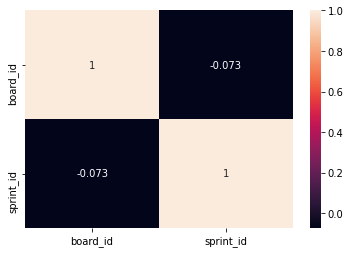

In [ ]:
sns.heatmap(corr, annot=True)

**Acima é exibida uma matriz de correlação entre as dimensões continuas do dataset, board_id e sprint_id.**

**Como forma de visualização foram gerados graficos que mostram a quantidade de cada uma das tasks e mostram tambem uma relação entre as tasks e a prioridade.**

**Gerando arquivo para a nossa API**

In [ ]:
# Criando arquivo com os dados tratados
sprints_data.to_csv('jira_issue_0_cleaned.csv',index=False)

# Criando um csv do formato que queremos para retornar na nossa API, simulando um banco de dados.
sprints_type = pd.crosstab(sprints_data['type'],sprints_data['gunning_fog']).apply(lambda r: ((r/r.sum())*100).round(2) , axis=1)
sprints_type.to_csv('jira_issue_0_response_api.csv',index=True, sep=";")

In [ ]:
# Utilizando Machine Learning para classificar as taks

**Após feita a limpeza e análise da base de dados, partimos para a aplicação da técnica de machine learning.**

In [ ]:
#Importando as bibliotecas de ML para classificação e predição.
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Convertendo as strings da coluna 'gunning_fog'.
sprints_data['gunning_fog'] = sprints_data['gunning_fog'].apply(lambda x: x.replace('easy','1').replace('medium', '2').replace('hard', '3'))

sprints_data['gunning_fog'] = pd.to_numeric(sprints_data['gunning_fog'])

**Após a importação das bibliotecas necessarias para o Machine Learning foi necessario fazer uma conversão da coluna gunning_fog(dificuldade) para números inteiros.**

In [ ]:
#Buscando e convertendo todos os dados nulos da coluna 'priority' para string 'Nulo'.
sprints_data['priority'] = sprints_data['priority'].fillna('Nulo')

In [ ]:
#Convertendo as strings da coluna 'priority'.
sprints_data['priority'] = sprints_data['priority'].apply(lambda x: x.replace('Nulo','0').replace('Minor','1').replace('Trivial', '2').replace('Major', '3').replace('Critical','4').replace('Blocker','5'))

sprints_data['priority'] = pd.to_numeric(sprints_data['priority'])

**Após a importação das bibliotecas necessarias para o Machine Learning foi necessario fazer uma conversão da coluna priority para números inteiros.**

In [ ]:
#Convertendo as strings da coluna 'type'.
sprints_data['type'] = sprints_data['type'].apply(lambda x: x.replace('Dev. 1','0').replace('Sub-task','1').replace('Dev. Sub-task', '2').replace('Story', '3').replace('Improvement','4').replace('Bug','5').replace('Task','6').replace('New Feature', '7').replace('Technical task', '8').replace('Concern','9').replace('Crucible Subtask','10').replace('QA Task','11').replace('Suggestion', '12').replace('Support Request', '13').replace('Documentation','14').replace('Feedback','15').replace('Third-party issue','16').replace('Development Task', '17').replace('Fug', '18').replace('Request','19').replace('QA 6','20').replace('Development 6','21'))

sprints_data['type'] = pd.to_numeric(sprints_data['type'])

**Após a importação das bibliotecas necessarias para o Machine Learning foi necessario fazer uma conversão da coluna type para números inteiros.**

**Para que a técnica fosse executada de forma correta foi preciso que todos os dados das colunas utilizadas fossem substituidos por números inteiros. Com isso determinamos que começariamos do 0 para o primeiro item substituindo até o ultimo item de cada coluna.**

In [ ]:
#Preparar os dados Separando nossa variável alvo 
x = sprints_data[['priority', 'type', 'board_id', 'sprint_id']].copy()

y= sprints_data[['gunning_fog']].copy()

**Como variavel alvo foi escolhida a coluna gunning_fog(dificuldade) para ser análisada e ser feita a predição usando todas as outras variaveis do dataset.**

In [ ]:
#Dividir um conjunto para teste e treinamento
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.33, random_state=324)

In [ ]:
#Criar modelo de ML
task_quality_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=1)
task_quality_classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
#Fazer Predição
predictions = task_quality_classifier.predict(x_test)


In [ ]:
#Testar acurácia do modelo
accuracy_score(y_true=y_test, y_pred=predictions)

0.5957565605806812

**Conforme visto acima, nossa acurácia de predição da variável gunning_fog com base nas dimensões selecionadas foi de aproximadamente 59,57%**.

**Segunda predição feita removendo as dimensões 'board_id' e 'sprint_id'.**

In [ ]:
#Preparar os dados Separando nossa variável alvo 
x = sprints_data[['priority', 'type']].copy()

y= sprints_data[['gunning_fog']].copy()

**Nesta nova predição, como variavel alvo foi escolhida a coluna gunning_fog(dificuldade) para ser análisada e ser feita a predição usando apenas duas variaveis do dataset, type e priority.**

In [ ]:
#Dividir um conjunto para teste e treinamento
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.33, random_state=324)

In [ ]:
#Criar modelo de ML
task_quality_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=1)
task_quality_classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
#Fazer Predição
predictions = task_quality_classifier.predict(x_test)


In [ ]:
#Testar acurácia do modelo
accuracy_score(y_true=y_test, y_pred=predictions)

0.5831937465103294

**Conforme visto acima, nossa acurácia de predição da variável alvo com base nas dimensões selecionadas foi de aproximadamente 58,31%**.

**Criando a nossa API**

In [ ]:
# Baixando o flask-ngrok
!pip install flask-ngrok

In [ ]:
# Importando as bibliotecas
from flask import Flask, jsonify, request, render_template
from flask_ngrok import run_with_ngrok

# Criando o server
app = Flask(__name__, static_url_path='')
run_with_ngrok(app)

In [ ]:
# Criando rotas

@app.route("/types/<name>", methods=['GET'])
def getCategoryData(name):
  # Importando o pandas
  import pandas as pd

  # Lendo o CSV 
  url = 'jira_issue_0_response_api.csv'
  data = pd.read_csv(url)

  # Transformando o CSV em Lista
  list = data.values.tolist()

  # Pegando os dados que precisamos
  for item in list:
    item_data = str(item[0]).split(";")
    item_type = item_data[0]
    if item_type.upper() == name.upper():
      # Retornando os dados
      return str(item_data)
  
  # Retornamos null caso não tenha um tipo
  return str("null")

@app.route("/")
def index():
  # Renderizando a página inicial
  return render_template("index.html")

In [ ]:
# Rodando o server
if __name__ == '__main__':
  app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://46068c405299.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [18/Jan/2021 21:53:56] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Jan/2021 21:54:26] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Jan/2021 21:54:29] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Jan/2021 21:54:34] "GET /types/B HTTP/1.1" 200 -
127.0.0.1 - - [18/Jan/2021 21:54:34] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [18/Jan/2021 21:54:34] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [18/Jan/2021 21:54:35] "GET /types/Buh HTTP/1.1" 200 -
127.0.0.1 - - [18/Jan/2021 21:54:35] "GET /types/Bu HTTP/1.1" 200 -
127.0.0.1 - - [18/Jan/2021 21:54:36] "GET /types/Bug HTTP/1.1" 200 -
127.0.0.1 - - [18/Jan/2021 21:54:37] "GET /types/Bug HTTP/1.1" 200 -
127.0.0.1 - - [18/Jan/2021 21:55:41] "GET /types/bu HTTP/1.1" 200 -
127.0.0.1 - - [18/Jan/2021 21:55:41] "GET /types/bug HTTP/1.1" 200 -
127.0.0.1 - - [18/Jan/2021 21:55:41] "GET /types/bu HTTP/1.1" 200 -
127.0.0.1 - - [18/Jan/2021 21:55:43] "GET /types/bu HTTP/1.1" 200 -
127.0.0.1 - - [18/Jan/2021 21:55:43] "GET /types/b HTTP/1.1" 20

**Foram importadas bibliotecas necessarias para a criação da API onde visualizaremos de forma mais prática a dificuldade de cada task de forma mais exclusiva. Ao escolher a task "bug" irá mostrar em forma de porcentagem o quanto a task obteve cada dificuldade.**